In [10]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_path = 'C:/Users/aless/Desktop/project/train/'
test_path = 'C:/Users/aless/Desktop/project/test/'
batch_size = 32

def normalize(image, label):
    image = image / 255.0  
    return image, label

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(48, 48),  
    color_mode='grayscale',  
    class_names = ['angry','disgust','fear','happy','neutral','sad','surprise'],
    batch_size=batch_size,
)
class_names = train_ds.class_names


Found 28709 files belonging to 7 classes.


In [13]:
# Dataset di test
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(48, 48),
    color_mode='grayscale',
    class_names = ['angry','disgust','fear','happy','neutral','sad','surprise'],
    batch_size=batch_size,
)

Found 7178 files belonging to 7 classes.


In [6]:
train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

In [14]:
# Comprova che ho normalizzato i valori
for images, labels in train_ds.take(1):  
    
    image = images[0]  
    label = labels[0]  

    # Converte l'immagine da un tensore a un array NumPy
    image_np = image.numpy()  # Immagine normalizzata
    original_image = image_np * 255  # Riporta i valori normalizzati a [0, 255]
    
    # Stampa i valori dei pixel originali (tra 0 e 255) e normalizzati (tra 0 e 1)
    print("Valori dei pixel originali (tra 0 e 255):")
    print(original_image)
    print("\nValori dei pixel normalizzati (tra 0 e 1):")
    print(image_np)

Valori dei pixel originali (tra 0 e 255):
[[[54315.]
  [54060.]
  [33150.]
  ...
  [10200.]
  [10455.]
  [13515.]]

 [[55080.]
  [54570.]
  [31620.]
  ...
  [ 8925.]
  [ 9180.]
  [11985.]]

 [[55080.]
  [53040.]
  [34935.]
  ...
  [ 8925.]
  [10710.]
  [ 8160.]]

 ...

 [[61200.]
  [61455.]
  [61200.]
  ...
  [56610.]
  [56865.]
  [57120.]]

 [[61455.]
  [61455.]
  [61455.]
  ...
  [58905.]
  [57630.]
  [57885.]]

 [[61455.]
  [61455.]
  [61455.]
  ...
  [58905.]
  [59415.]
  [59670.]]]

Valori dei pixel normalizzati (tra 0 e 1):
[[[213.]
  [212.]
  [130.]
  ...
  [ 40.]
  [ 41.]
  [ 53.]]

 [[216.]
  [214.]
  [124.]
  ...
  [ 35.]
  [ 36.]
  [ 47.]]

 [[216.]
  [208.]
  [137.]
  ...
  [ 35.]
  [ 42.]
  [ 32.]]

 ...

 [[240.]
  [241.]
  [240.]
  ...
  [222.]
  [223.]
  [224.]]

 [[241.]
  [241.]
  [241.]
  ...
  [231.]
  [226.]
  [227.]]

 [[241.]
  [241.]
  [241.]
  ...
  [231.]
  [233.]
  [234.]]]


TypeError: 'module' object is not callable

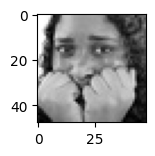

In [9]:
for images, labels in train_ds.take(1):  # Prendi solo il primo batch
    for i in range(9):
        plt.subplot(3, 3, 1 + i)  # Divide in 9 subplot
        plt.imshow(images[i].numpy(), cmap='gray')  # Mostra l'immagine normalizzata
        plt.title(class_names[np(labels[i].numpy())])  # Mostra la classe come titolo
        plt.axis("off")
    plt.show()  

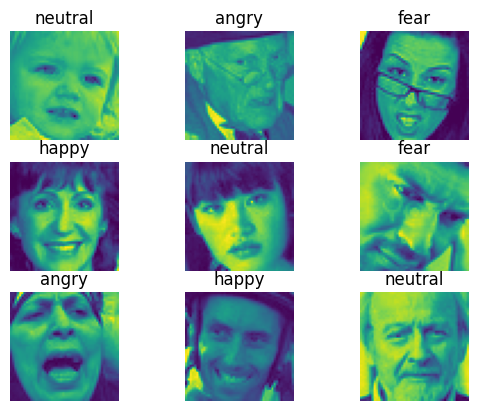

In [15]:
# Codice alessio
for images,labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, 1 + i)  # divide into 9 subplots and set current image at corresponding subplot
        plt.imshow(np.uint8(images[i]))  # show current image after converting properly (doesn't show otherwise)
        plt.title(train_ds.class_names[labels[i].numpy()])  # show class as title; get numerical label first, then convert to original class
        plt.axis("off")

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    #BatchNormalization(),
    #MaxPooling2D((2, 2)),
    #Dropout(0.2),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  
])

# Compilazione del modello
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Allenamento del modello
history = model.fit(train_ds,                  
                    epochs=1000,
                    validation_data=test_ds,
                    callbacks=[early_stopping])

Epoch 1/1000


c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/898 ━━━━━━━━━━━━━━━━━━━━ 3:17 266ms/step - accuracy: 0.1957 - loss: 5.6650

KeyboardInterrupt: 